<a href="https://colab.research.google.com/github/giuuusepeda/MLwTF/blob/main/machine-learning-with-tensorflow/week-01/Week1_Notebook1_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing Price Prediction using a Neural Network

## Objective
In this exercise, you will:
1. Create a synthetic dataset for housing prices based on a linear equation.
2. Build and train a simple neural network with one neuron to predict housing prices.

---

## Step 1: Import Libraries
Let's start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

---

## Step 2: Create a Synthetic Dataset
We will create a dataset for housing prices that follows the equation

$\text{price}$ = $\text{number of bedrooms}$ $\times  x$ + $\text{base price}$


In [2]:
# Number of samples
n_samples = 1000

# Generate random number of bedrooms between 1 and 5
bedrooms = np.random.randint(1, 6, n_samples)

# Constants for the equation
x = 0.5  # The price added per bedroom in onehundred thousands
base_price = 1  # Base price of a house in onehundred thousands

# Generate housing prices based on the equation
prices = bedrooms * x + base_price

# Create a DataFrame
df = pd.DataFrame({'bedrooms': bedrooms, 'price': prices})

# Show the first few rows
df.head()

,bedrooms,price
0,3,2.5
1,4,3.0
2,2,2.0
3,5,3.5
4,1,1.5


---

## Step 3: Visualize the Data
Plot the data to visualize the relationship between the number of bedrooms and the price.


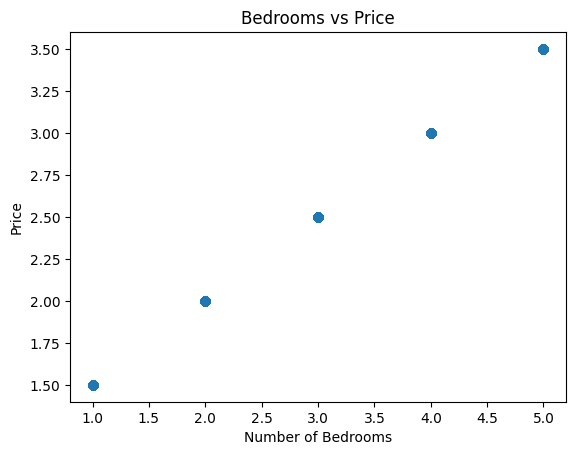

In [3]:
plt.scatter(df['bedrooms'], df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()


---

## Step 4: Preprocess the Data
Split the data into features (`X`) and labels (`y`), and then into training and testing sets.


In [4]:
# Features and Labels
X = df[['bedrooms']]
y = df['price']

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (800, 1) (800,)
Test shapes: (200, 1) (200,)


---

## Step 5: Build a Neural Network
Build a simple neural network with one neuron to predict the house prices.
Pick a loss function that suits this problem.


In [ ]:
# TODO Create the model


# TODO Compile the model


# TODO print a Summary of the model
# Hint: for the parameters to show, you need to define an Input layer; alternatively, you can inspect the summary after fitting the model


---

## Step 6: Train the Model
Train the model using the training data.


In [ ]:
# TODO Train the model

---

## Step 7: Evaluate the Model
Evaluate the model using the test data and plot its prediction.


In [ ]:
# TODO Evaluate the model using the model.evaluate() function


# TODO Make predictions


# TODO Plot real vs predicted prices (hint: you can use the plotting code from above as a start)



# Step 8: Optional
Go back to the start and experiment what happens if instead of representing a price of a house costing onehundred thousand by a 1 we use the raw number 100,000 instead.

Try to explain what happened and why.